In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Students_gamification_grades.csv')
df.shape

(69, 16)

In [2]:
# rename column User to Did Use Gamification
df.rename(columns={'User': 'Did Use Gamification'}, inplace=True)
df['Did Use Gamification'] = df['Did Use Gamification'].astype(bool)
df.head()

,Student_ID,Practice_Exam,Final_Exam,Did Use Gamification,Avg_Grade_Q1,Avg_Grade_Q2,Avg_Grade_Q3,Avg_Grade_Q4,Avg_Grade_Q5,Avg_Grade_Q6,No_access_Q1,No_access_Q2,No_access_Q3,No_access_Q4,No_access_Q5,No_access_Q6
0,1046,9.33,7.98,True,6.00,10.0,10.0,10.0,0.0,8.0,1,1,1,1,0,1
1,1048,2.89,6.49,False,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,1050,7.67,6.90,True,9.00,10.0,10.0,10.0,10.0,10.0,1,1,1,1,1,1
3,1052,4.97,7.69,True,6.00,9.0,5.0,4.0,9.0,4.0,2,2,2,1,1,2
4,1054,3.89,7.78,True,9.33,10.0,10.0,10.0,10.0,10.0,12,1,1,1,1,1


In [3]:
df['Student_ID'].nunique() == df.shape[0]

True

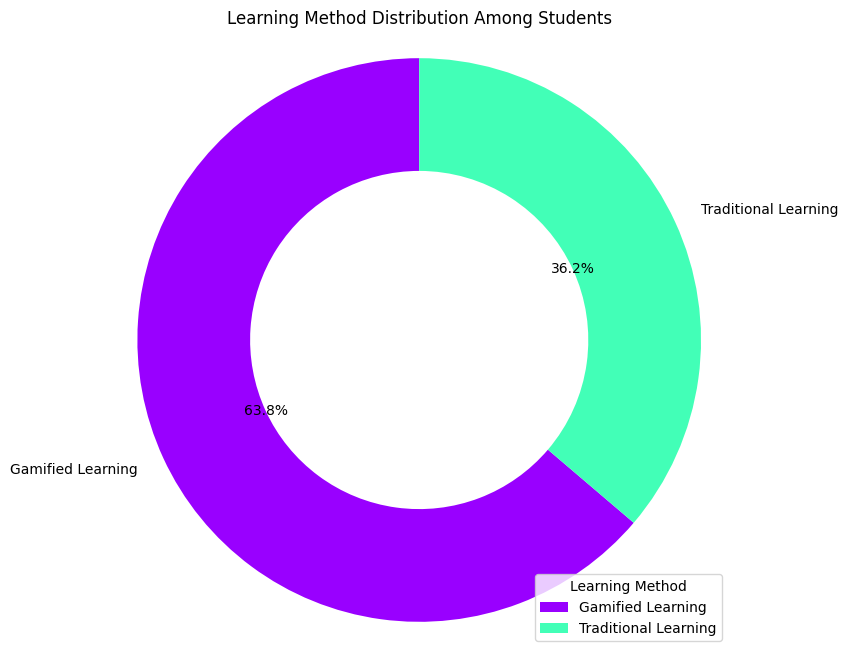

In [10]:
custom_colors = ['#ffffff', '#ff00ff', '#9900ff', '#42ffb7']

gam_counts = df["Did Use Gamification"].value_counts()
labels = ["Gamified Learning", "Traditional Learning"]

plt.figure(figsize=(8, 8))
plt.pie(
    gam_counts,
    labels=labels,
    colors=custom_colors[2:5],
    wedgeprops=dict(width=0.4),
    startangle=90,
    autopct="%1.1f%%",
)
plt.legend(title="Learning Method", loc="lower right")
plt.axis("equal")
plt.title("Learning Method Distribution Among Students")
plt.show()

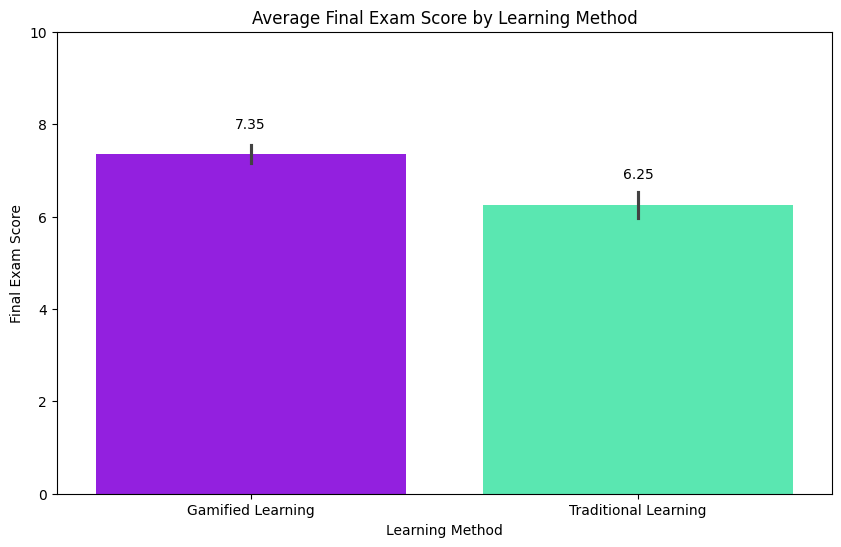

In [12]:
palette = {
    'Gamified Learning': custom_colors[2],
    'Traditional Learning': custom_colors[3] 
}

df['Learning Method'] = df['Did Use Gamification'].map({True: 'Gamified Learning', False: 'Traditional Learning'})

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=df,
    x="Learning Method",
    y="Final_Exam",
    hue="Learning Method",
    palette=palette,
    estimator='mean',
    errorbar='se'
)

for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.2f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + .5),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.ylim(0, 10)
plt.xlabel("Learning Method")
plt.ylabel("Final Exam Score")
plt.title("Average Final Exam Score by Learning Method")
plt.show()

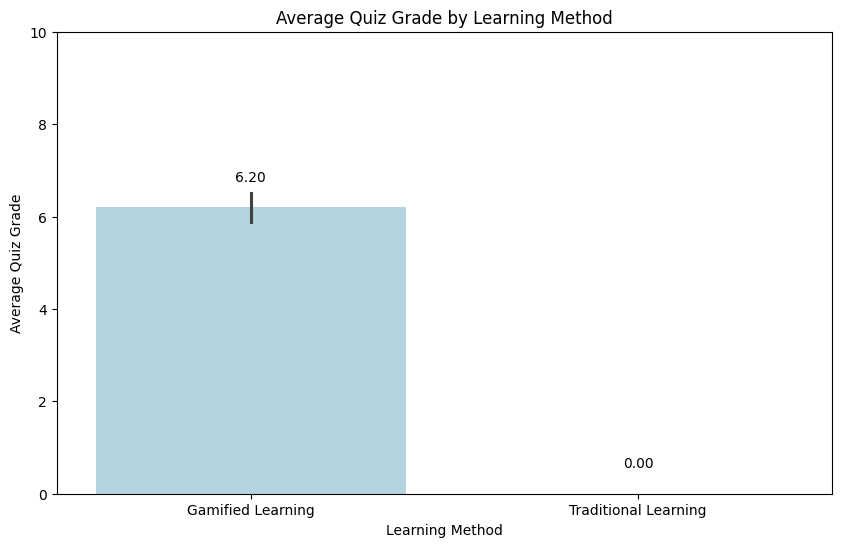

In [6]:
df['Average_Quiz_Grade'] = df[[f'Avg_Grade_Q{i}' for i in range(1, 7)]].mean(axis=1)

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=df,
    x="Learning Method",
    y="Average_Quiz_Grade",
    hue="Learning Method",
    palette={'Gamified Learning': "lightblue", 'Traditional Learning': "lightcoral"},
    estimator='mean',
    errorbar='se'
)
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.2f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + .5),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.ylim(0, 10)
plt.xlabel("Learning Method")
plt.ylabel("Average Quiz Grade")
plt.title("Average Quiz Grade by Learning Method")
plt.show()

In [14]:
df2 = pd.read_csv('EXP_data.csv')
df2.shape

(90057, 17)

In [15]:
df2.columns

Index(['Cor', 'Rt', 'condition', 'inprobe', 'block', 'game', 'gameIn',
       'TimePassage2', 'TimePassage1', 'attention1', 'attention2', 'boring1',
       'boring2', 'Time_estimate1', 'Time_estimate2', 'mode', 'id'],
      dtype='object')

In [16]:
df2['Gamified'] = df2['game'].map({0: 'Traditional Learning', 1: 'Gamified Learning'})

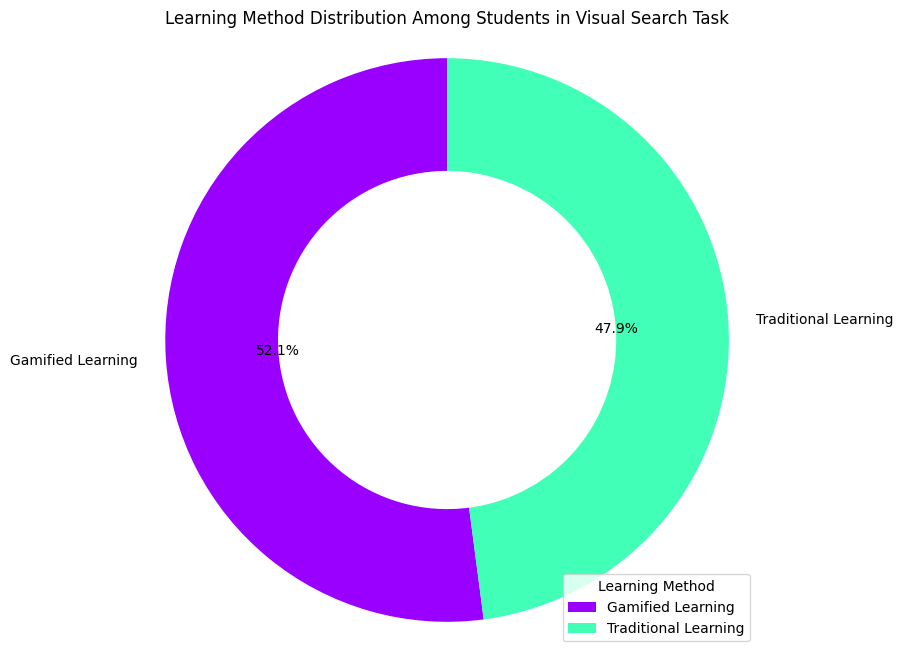

In [17]:
# distribution of Learningmethods
plt.figure(figsize=(8, 8))
gam_counts2 = df2['Gamified'].value_counts()
labels2 = ["Gamified Learning", "Traditional Learning"]
colors2 = custom_colors[2:4]
plt.pie(
    gam_counts2,
    labels=labels2,
    colors=colors2,
    wedgeprops=dict(width=0.4),
    startangle=90,
    autopct="%1.1f%%",
)
plt.legend(title="Learning Method", loc="lower right")
plt.axis("equal")
plt.title("Learning Method Distribution Among Students in Visual Search Task")
plt.show()

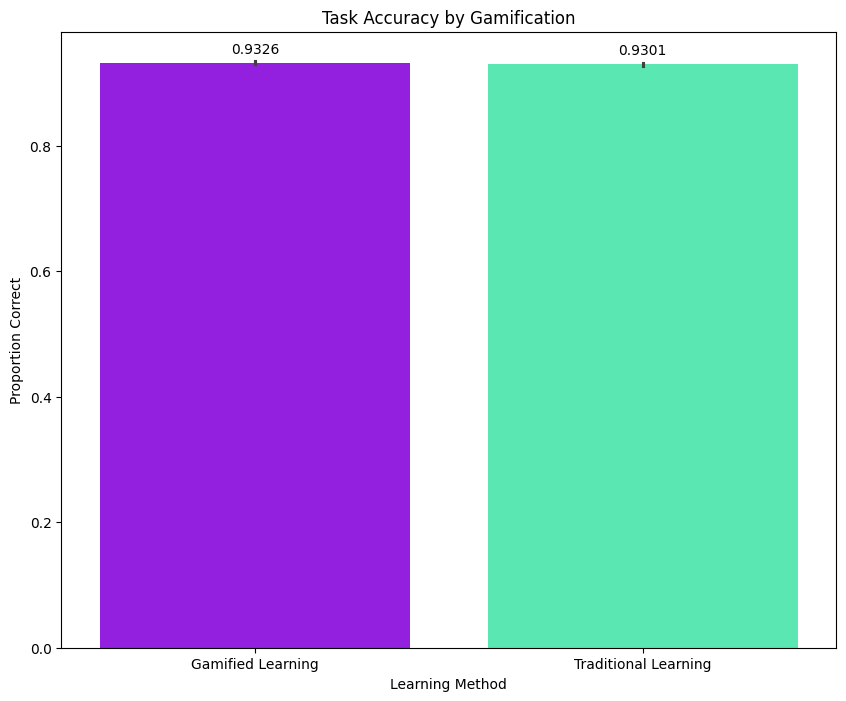

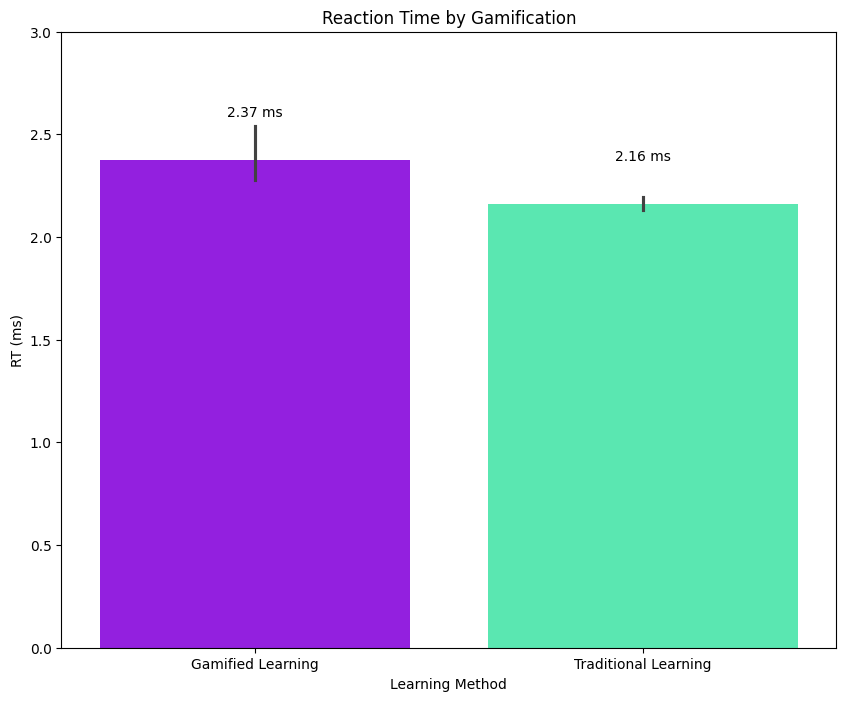

In [26]:
# Accuracy (correctness)
plt.figure(figsize=(10, 8))
bars = sns.barplot(
    data=df2, x="Gamified", y="Cor", hue="Gamified", palette=palette, errorbar=("ci", 95)
)
for bar in bars.patches:
    bars.annotate(
        f"{bar.get_height():.4f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.title("Task Accuracy by Gamification")
plt.xlabel("Learning Method")
plt.ylabel("Proportion Correct")
plt.show()

# Reaction Time
plt.figure(figsize=(10, 8))
bars = sns.barplot(data=df2, x="Gamified", y="Rt", hue="Gamified", palette=palette)
for bar in bars.patches:
    bars.annotate(
        f"{bar.get_height():.2f} ms",
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.ylim(0, 3)
plt.title("Reaction Time by Gamification")
plt.xlabel("Learning Method")
plt.ylabel("RT (ms)")
plt.show()

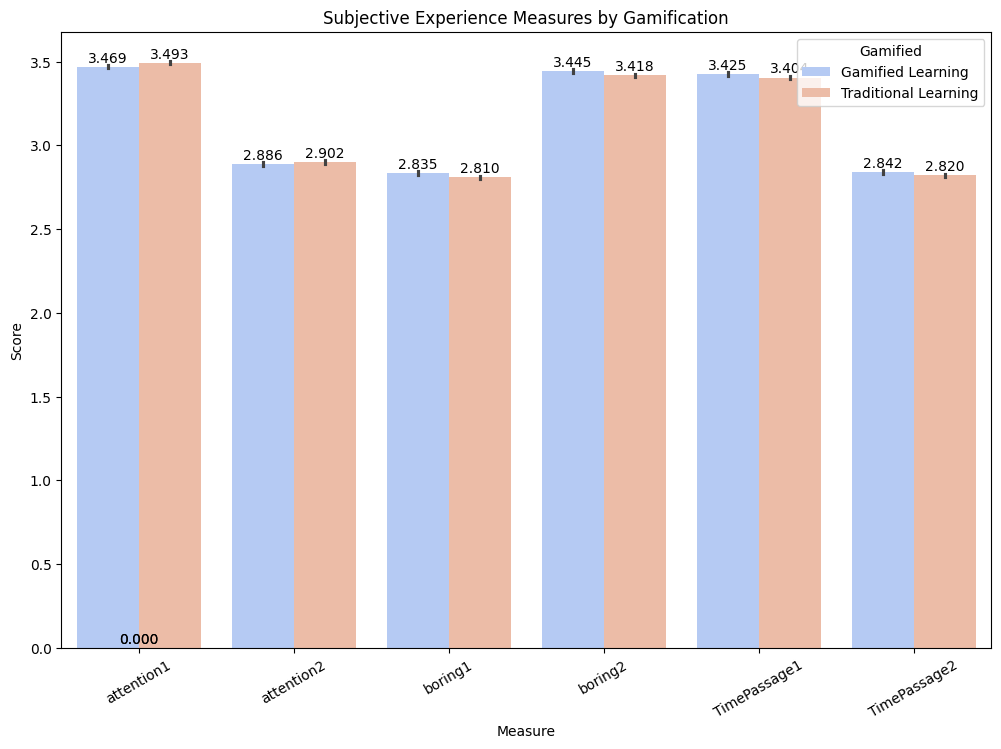

In [12]:
melted = df2.melt(
    id_vars=["id", "Gamified"],
    value_vars=["attention1", "attention2", "boring1", "boring2", "TimePassage1", "TimePassage2"],
    var_name="Measure",
    value_name="Score"
)

plt.figure(figsize=(12, 8))
# sns.boxplot(data=melted, x="Measure", y="Score", hue="Gamified", palette="Set3")
bars = sns.barplot(data=melted, x="Measure", y="Score", hue="Gamified", palette="coolwarm")
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.3f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.title("Subjective Experience Measures by Gamification")
plt.xticks(rotation=30)
plt.show()

In [13]:
df2.columns

Index(['Cor', 'Rt', 'condition', 'inprobe', 'block', 'game', 'gameIn',
       'TimePassage2', 'TimePassage1', 'attention1', 'attention2', 'boring1',
       'boring2', 'Time_estimate1', 'Time_estimate2', 'mode', 'id',
       'Gamified'],
      dtype='object')

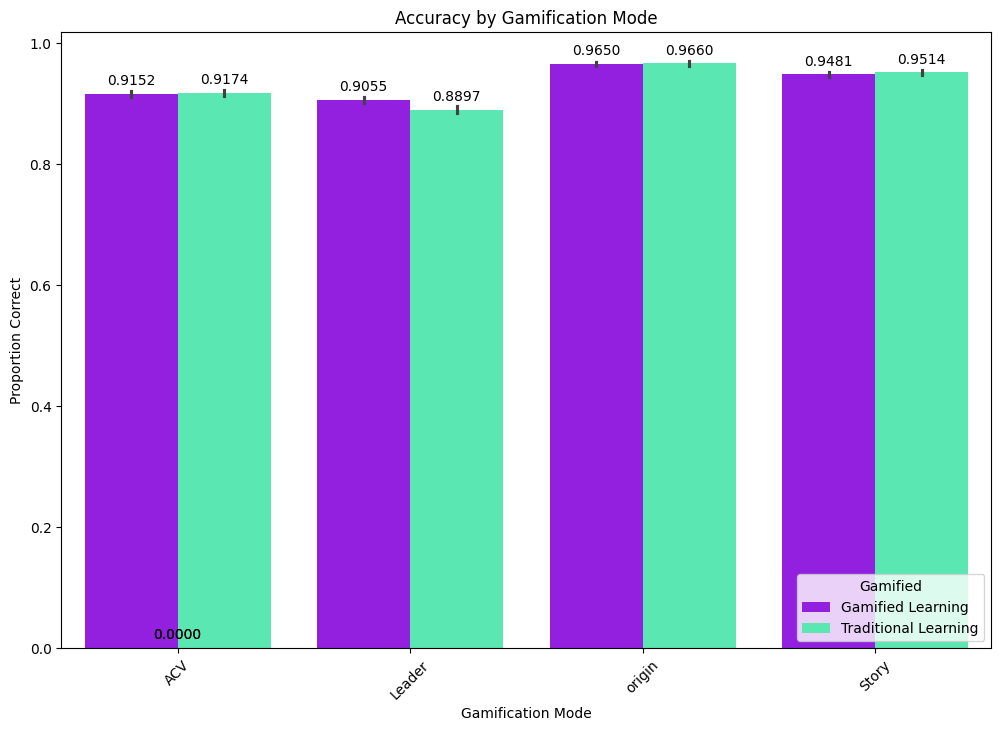

In [27]:
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=df2, x="mode", y="Cor", hue='Gamified', palette=palette)
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.4f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.title("Accuracy by Gamification Mode")
plt.xlabel("Gamification Mode")
plt.ylabel("Proportion Correct")
plt.xticks(rotation=45)
plt.show()

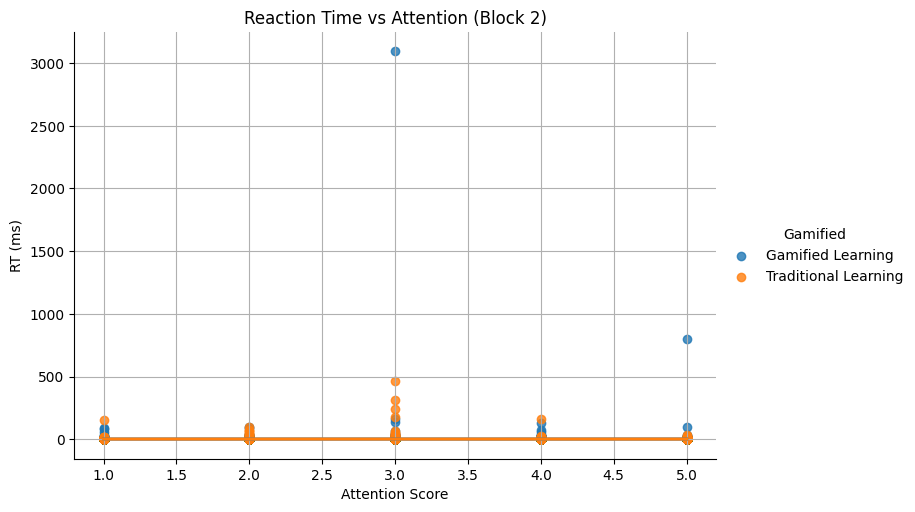

In [15]:
sns.lmplot(data=df2, x="attention2", y="Rt", hue="Gamified", aspect=1.5)
plt.title("Reaction Time vs Attention (Block 2)")
plt.grid(True)
plt.xlabel("Attention Score")
plt.ylabel("RT (ms)")
plt.show()

In [28]:
ar_df = pd.read_csv('AR_Vocabulary_Dataset_Char_Target.csv')
ar_df.shape

(200, 12)

In [29]:
ar_df.head()

,User_ID,Age,Grade_Level,Activity_Type,Duration,Pre_Test_Score,Engagement_Score,AR_Feature_Used,Feedback_Score,Accuracy,Completion_Rate,Post_Test_Category
0,User_1,16,Primary,Real-World Task,0.849372,0.897436,0.448276,Interactive AR,0.0,0.662857,0.614995,High
1,User_2,13,Secondary,Word Matching,0.598326,0.128205,0.034483,Animations,0.0,0.938151,0.983789,Medium
2,User_3,14,Primary,Gamified Quiz,0.907950,0.769231,0.551724,Interactive AR,1.0,0.732437,0.630193,High
3,User_4,16,Primary,Gamified Quiz,0.907950,0.461538,0.448276,Interactive AR,0.0,0.210420,0.253293,High
4,User_5,12,Secondary,Real-World Task,0.732218,0.974359,0.862069,Animations,0.0,0.025210,0.632219,High


In [30]:
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             200 non-null    object 
 1   Age                 200 non-null    int64  
 2   Grade_Level         200 non-null    object 
 3   Activity_Type       200 non-null    object 
 4   Duration            200 non-null    float64
 5   Pre_Test_Score      200 non-null    float64
 6   Engagement_Score    200 non-null    float64
 7   AR_Feature_Used     200 non-null    object 
 8   Feedback_Score      200 non-null    float64
 9   Accuracy            200 non-null    float64
 10  Completion_Rate     200 non-null    float64
 11  Post_Test_Category  200 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 18.9+ KB


In [31]:
# target to inspect is 'Post_Test_Category' which tells us if the student who used gamification and its impact on their performance
ar_df['Post_Test_Category'].value_counts()

Post_Test_Category
High      122
Medium     73
Low         5
Name: count, dtype: int64

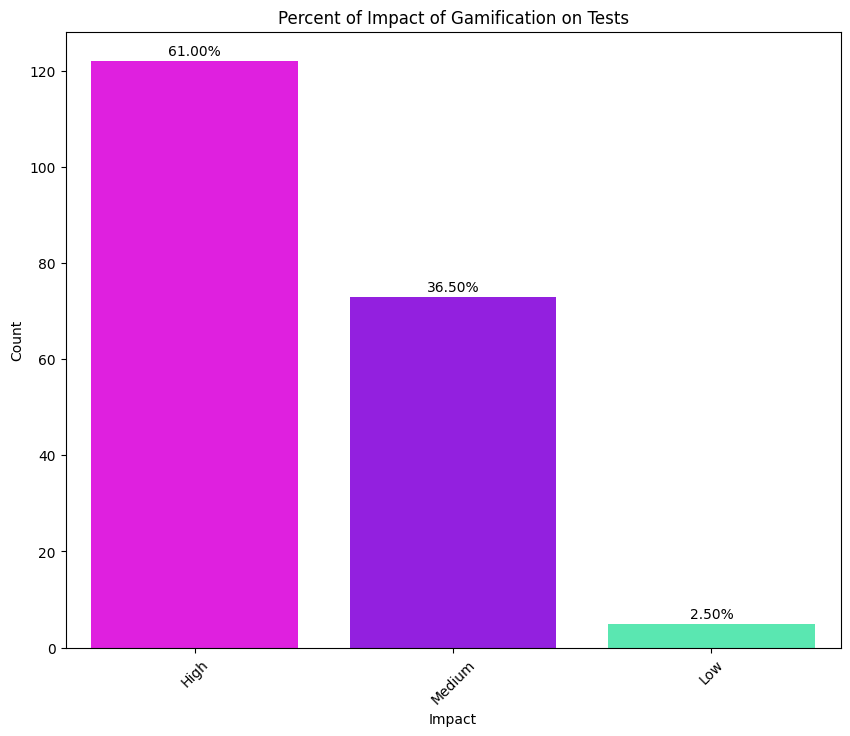

In [37]:
plt.figure(figsize=(10, 8))
bars = sns.countplot(
    data=ar_df, x="Post_Test_Category", hue="Post_Test_Category", palette=custom_colors[1:]
)
for bar in bars.patches:
    bars.annotate(
        f"{bar.get_height() / ar_df.shape[0] * 100:.2f}%",
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.title("Percent of Impact of Gamification on Tests")
plt.xlabel("Impact")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

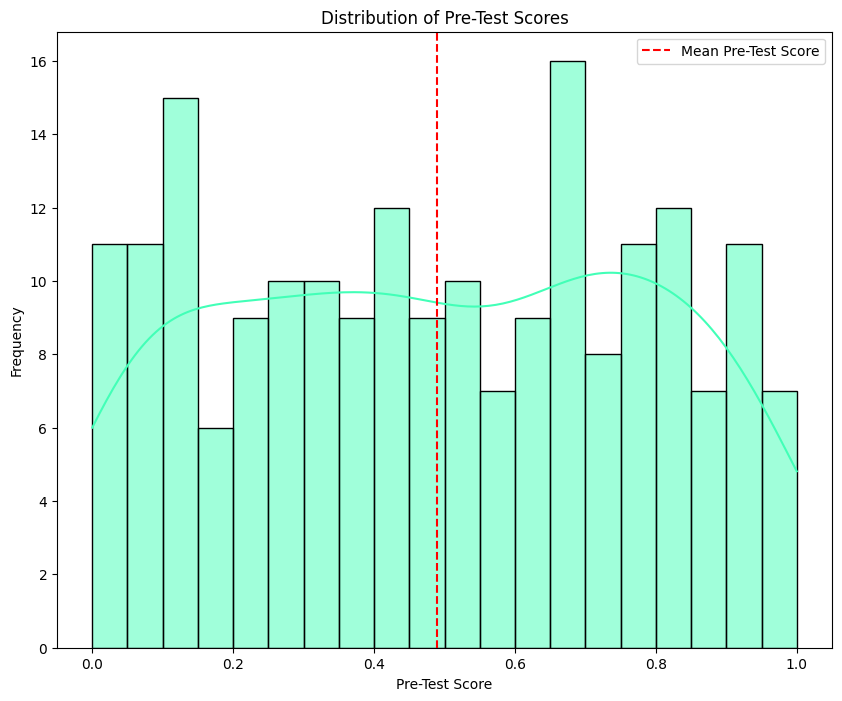

In [47]:
# distribution of pre test score
plt.figure(figsize=(10, 8))
sns.histplot(ar_df['Pre_Test_Score'], bins=20, kde=True, color=custom_colors[3])
plt.title("Distribution of Pre-Test Scores")
plt.xlabel("Pre-Test Score")
plt.ylabel("Frequency")
plt.axvline(ar_df['Pre_Test_Score'].mean(), color='red', linestyle='--', label='Mean Pre-Test Score')
plt.legend()
plt.show()

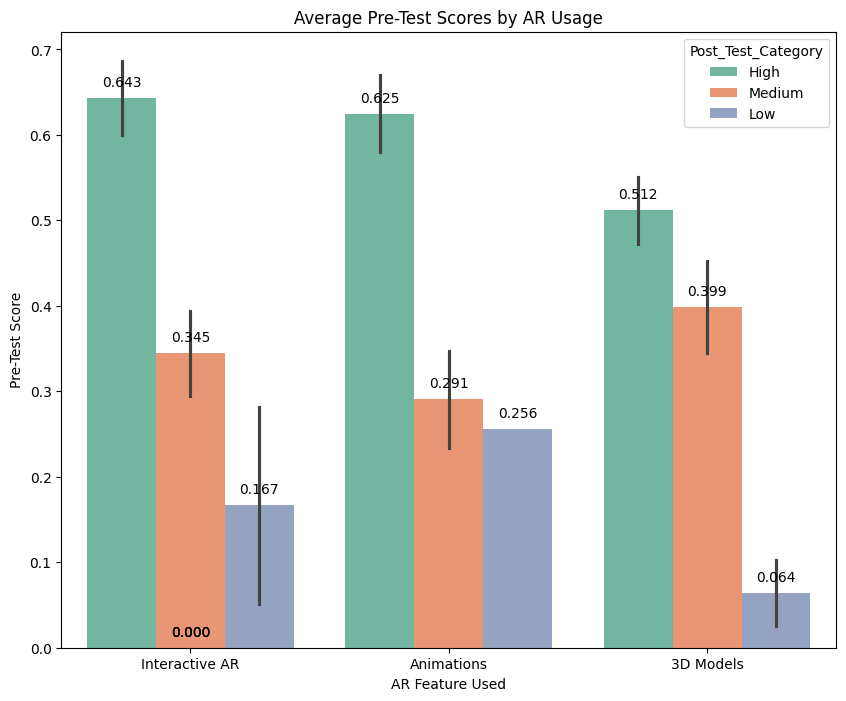

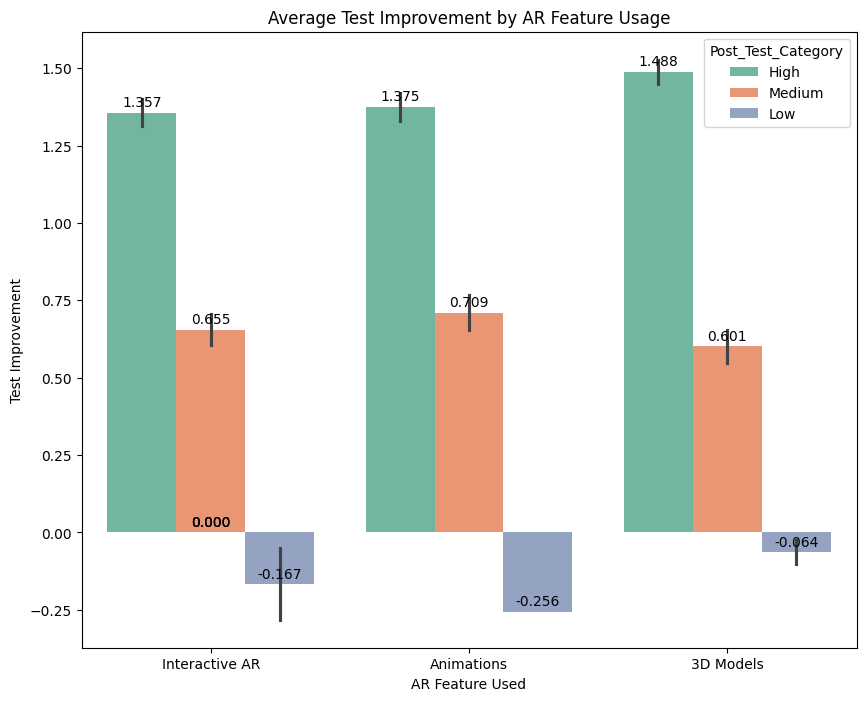

In [31]:
ar_df["Test_Improvement"] = ar_df["Post_Test_Category"].map({
    "Low": 0, "Medium": 1, "High": 2  # numeric proxy for categorical outcome
}) - ar_df["Pre_Test_Score"]

plt.figure(figsize=(10, 8))
bars = sns.barplot(
    data=ar_df,
    x="AR_Feature_Used",
    y="Pre_Test_Score",
    hue="Post_Test_Category",
    palette="Set2",
    estimator='mean',
    errorbar='se'
)
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.3f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.title("Average Pre-Test Scores by AR Usage")
plt.xlabel("AR Feature Used")
plt.ylabel("Pre-Test Score")
plt.show()

plt.figure(figsize=(10, 8))
bars = sns.barplot(
    data=ar_df,
    x="AR_Feature_Used",
    y="Test_Improvement",
    hue="Post_Test_Category",
    palette="Set2",
    estimator='mean',
    errorbar='se'
)
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.3f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.title("Average Test Improvement by AR Feature Usage")
plt.xlabel("AR Feature Used")
plt.ylabel("Test Improvement")
plt.show()

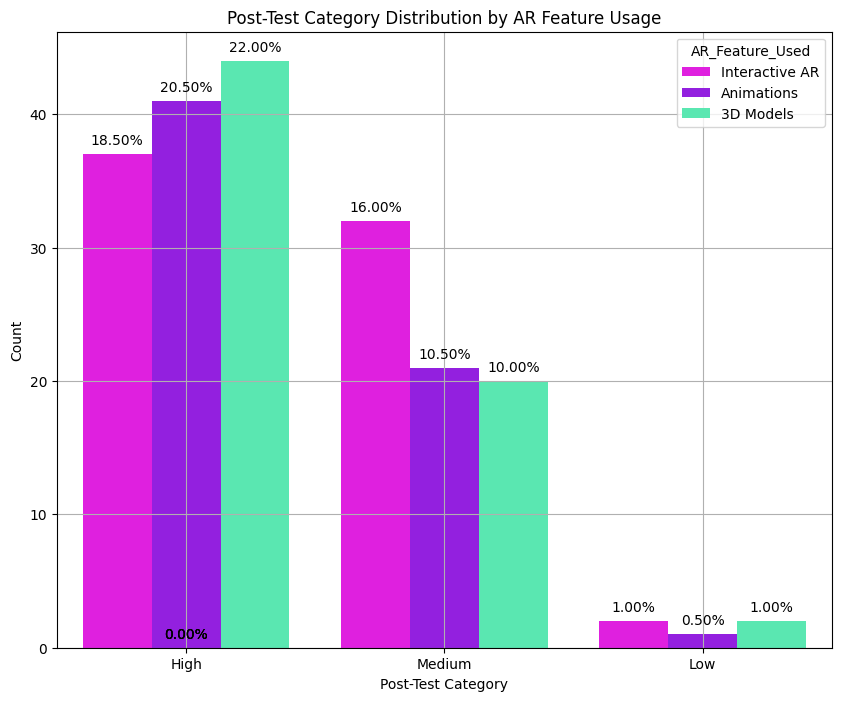

In [48]:
plt.figure(figsize=(10, 8))
bars = sns.countplot(data=ar_df, x="Post_Test_Category", hue="AR_Feature_Used", palette=custom_colors[1:])
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height() / ar_df.shape[0] * 100:.2f}%',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.xlabel("Post-Test Category")
plt.ylabel("Count")
plt.grid(True)
plt.title("Post-Test Category Distribution by AR Feature Usage")
plt.show()

<Figure size 1200x800 with 0 Axes>

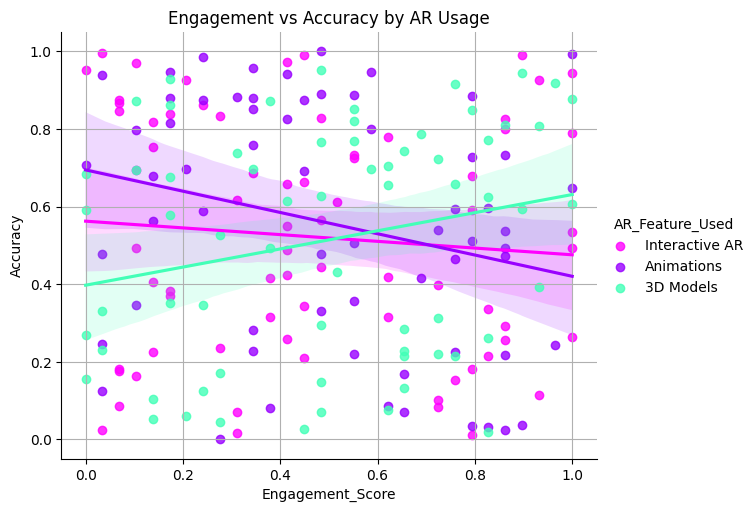

In [53]:
plt.figure(figsize=(12, 8))
sns.lmplot(data=ar_df, x="Engagement_Score", y="Accuracy", hue="AR_Feature_Used", palette=custom_colors[1:], aspect=1.25)
plt.title("Engagement vs Accuracy by AR Usage")
plt.grid(True)
plt.show()

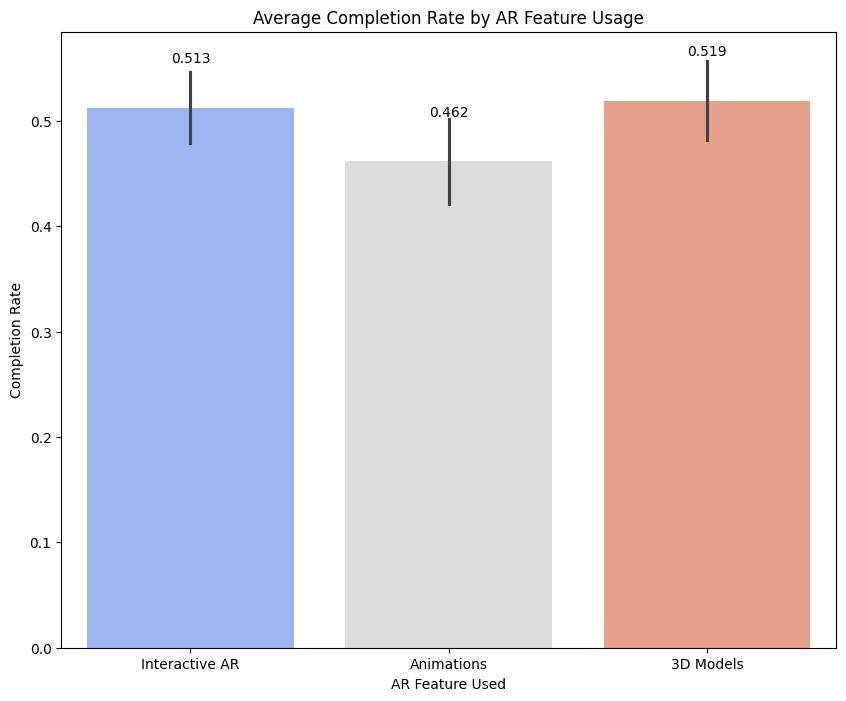

In [61]:
plt.figure(figsize=(10, 8))
bars = sns.barplot(
    data=ar_df,
    x="AR_Feature_Used",
    y="Completion_Rate",
    hue="AR_Feature_Used",
    palette="coolwarm",
    estimator="mean",
    errorbar="se",
)
for bar in bars.patches:
    bars.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.04),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.title("Average Completion Rate by AR Feature Usage")
plt.xlabel("AR Feature Used")
plt.ylabel("Completion Rate")
plt.show()

/var/folders/r8/wfzbzqkx22z5qjdyjqnmsf740000gn/T/ipykernel_10356/3973995906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


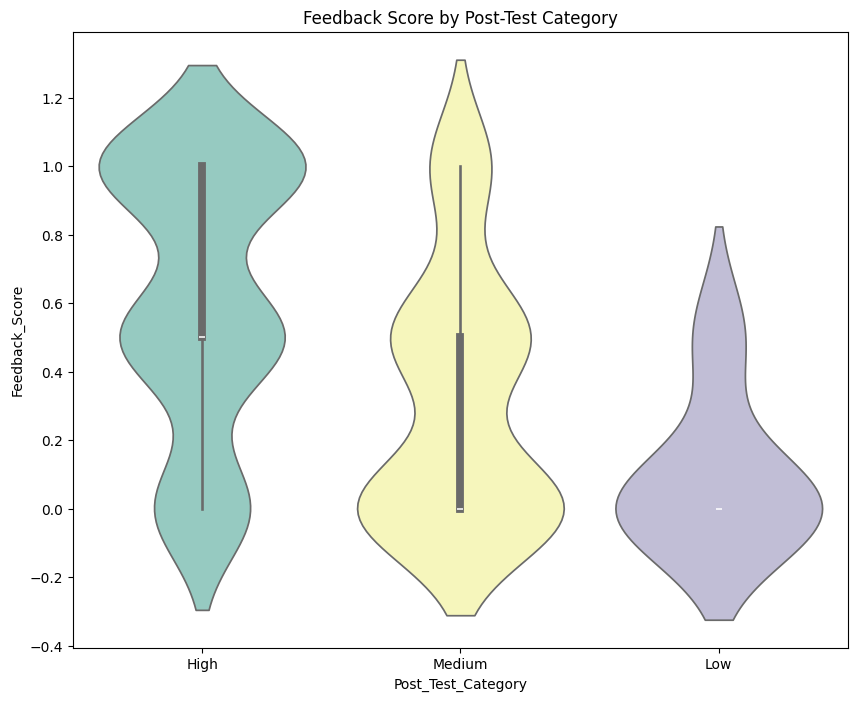

In [36]:
plt.figure(figsize=(10, 8))
sns.violinplot(
    data=ar_df,
    x="Post_Test_Category",
    y="Feedback_Score",
    palette="Set3"
)
plt.title("Feedback Score by Post-Test Category")
plt.show()

In [40]:
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 10.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import plotly.graph_objects as go

# Group and average
grouped = (
    ar_df.groupby(["Grade_Level", "Post_Test_Category"])["Accuracy"]
    .mean()
    .reset_index()
)

# Convert categories to numeric for plotting
grade_levels = grouped["Grade_Level"].astype("category")
post_categories = grouped["Post_Test_Category"].astype("category")

grouped["x"] = grade_levels.cat.codes
grouped["y"] = post_categories.cat.codes
grouped["z"] = grouped["Accuracy"]

# Create 3D scatter bars (vertical lines)
fig = go.Figure()

for i, row in grouped.iterrows():
    fig.add_trace(
        go.Scatter3d(
            x=[row["x"], row["x"]],
            y=[row["y"], row["y"]],
            z=[0, row["z"]],
            mode="lines+markers",
            line=dict(color="blue", width=10),
            marker=dict(size=5, color="orange"),
            showlegend=False,
        )
    )

# Axes formatting
fig.update_layout(
    title="Average Accuracy by Grade Level and Post-Test Category",
    scene=dict(
        xaxis=dict(
            title="Grade Level",
            tickvals=grouped["x"].unique(),
            ticktext=grade_levels.cat.categories,
        ),
        yaxis=dict(
            title="Post-Test Category",
            tickvals=grouped["y"].unique(),
            ticktext=post_categories.cat.categories,
        ),
        zaxis=dict(title="Average Accuracy"),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()